In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niravpatidar37/Data/main/GCB2022v27_MtCO2_flat.csv')

In [3]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
df.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


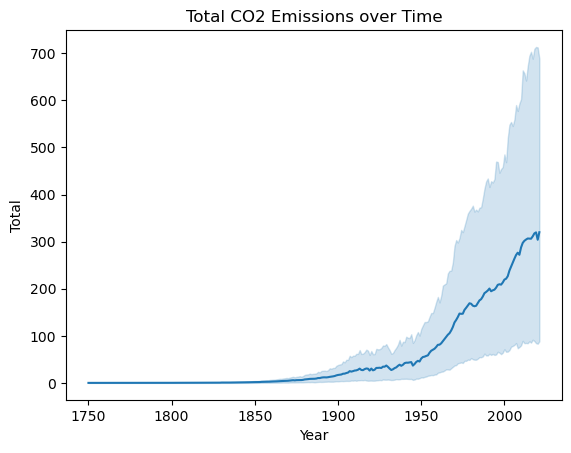

In [6]:
sns.lineplot(data=df, x='Year', y='Total')
plt.title('Total CO2 Emissions over Time')
plt.show()

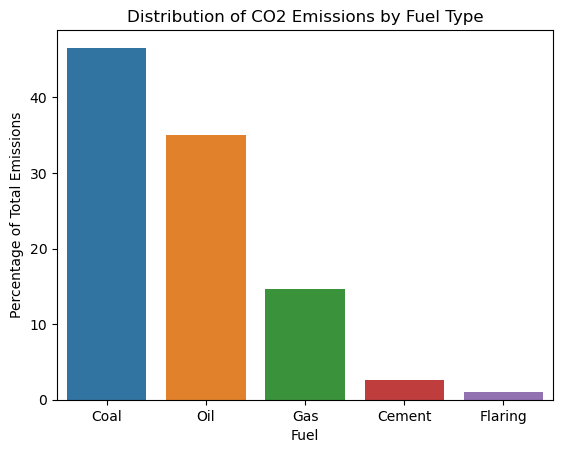

In [7]:
# Create a stacked bar chart showing the distribution of CO2 emissions by fuel type
df_fuel = df[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']].sum().reset_index()
df_fuel.columns = ['Fuel', 'Emissions']
df_fuel['Percentage'] = df_fuel['Emissions'] / df_fuel['Emissions'].sum() * 100

sns.barplot(data=df_fuel, x='Fuel', y='Percentage')
plt.title('Distribution of CO2 Emissions by Fuel Type')
plt.ylabel('Percentage of Total Emissions')
plt.show()

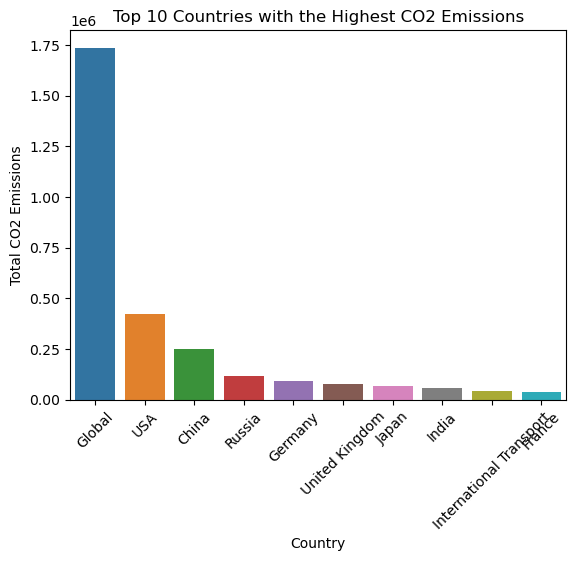

In [8]:
# Create a bar chart showing the top 10 countries with the highest CO2 emissions
df_country = df.groupby('Country')['Total'].sum().reset_index().sort_values('Total', ascending=False).head(10)

sns.barplot(data=df_country, x='Country', y='Total')
plt.title('Top 10 Countries with the Highest CO2 Emissions')
plt.ylabel('Total CO2 Emissions')
plt.xticks(rotation=45)
plt.show()

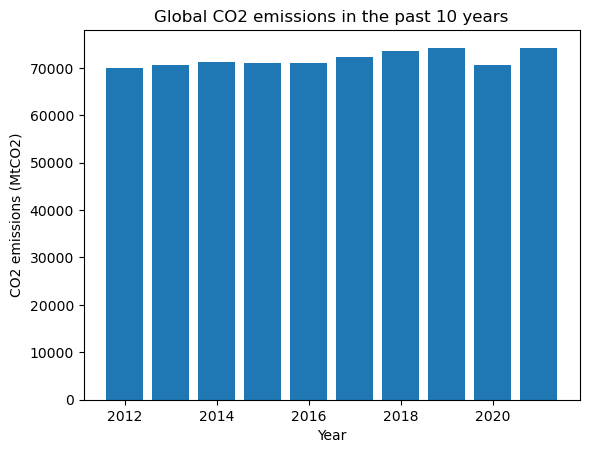

In [9]:
current_year = 2022
start_year = current_year - 10
recent_df = df[df['Year'] >= start_year]

# aggregate the data by year
grouped_df = recent_df.groupby('Year').sum()

# create a bar plot of the total CO2 emissions by year
fig, ax = plt.subplots()
ax.bar(grouped_df.index, grouped_df['Total'])
ax.set_xlabel('Year')
ax.set_ylabel('CO2 emissions (MtCO2)')
ax.set_title('Global CO2 emissions in the past 10 years')
plt.show()

In [10]:
df.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [11]:
# Impute missing values with the mean value of each numeric column
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

In [12]:
# Create a new feature Total without Cement
df['Total without Cement'] = df['Total'] - df['Cement']

In [13]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['Country', 'ISO 3166-1 alpha-3'], axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[2:])
df_scaled[['Country', 'ISO 3166-1 alpha-3']] = df[['Country', 'ISO 3166-1 alpha-3']]

In [14]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(['Country', 'ISO 3166-1 alpha-3', 'Total'], axis=1)
y = df_scaled['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shape of each set
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (50483, 9)
y_train shape: (50483,)
X_test shape: (12621, 9)
y_test shape: (12621,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression')
print('------------------')
print(f'MSE: {mse_lr:.4f}')
print(f'R^2: {r2_lr:.4f}')

Linear Regression
------------------
MSE: 0.0000
R^2: 1.0000


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression')
print('------------------------')
print(f'MSE: {mse_rf:.4f}')
print(f'R^2: {r2_rf:.4f}')

Random Forest Regression
------------------------
MSE: 0.0002
R^2: 0.9996


In [17]:
from sklearn.neural_network import MLPRegressor

# Train the model
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print('MLP Neural Network')
print('------------------')
print(f'MSE: {mse_mlp:.4f}')
print(f'R^2: {r2_mlp:.4f}')

MLP Neural Network
------------------
MSE: 0.0001
R^2: 0.9997


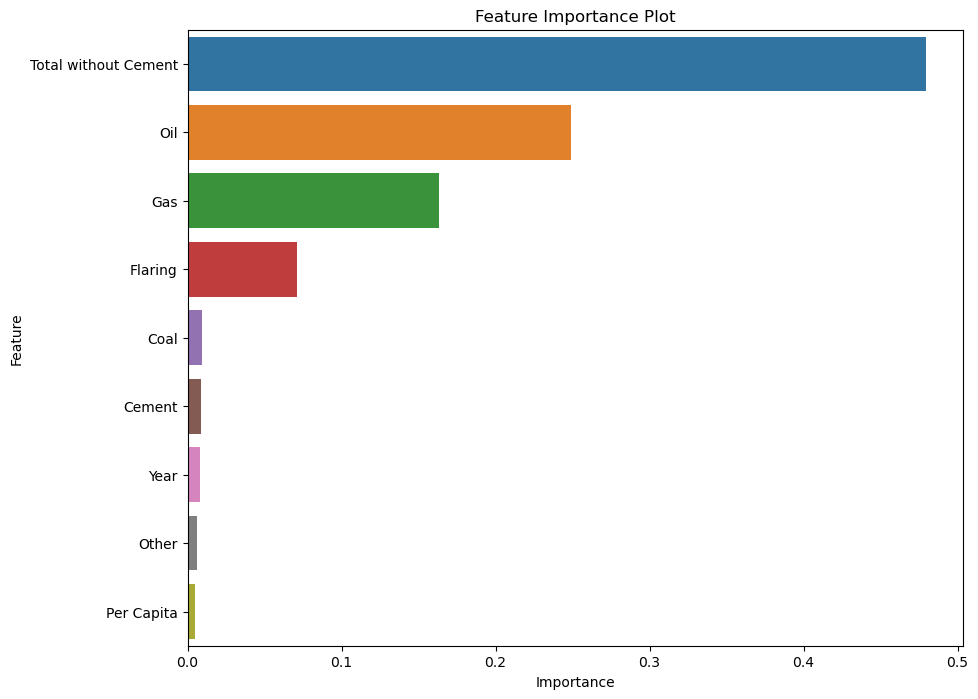

In [18]:
# Get feature importances from the model
feature_importances = rf.feature_importances_

# Create a dataframe with feature importances
features_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort the dataframe by feature importance
features_df = features_df.sort_values('importance', ascending=False)

# Create a bar chart of feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=features_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

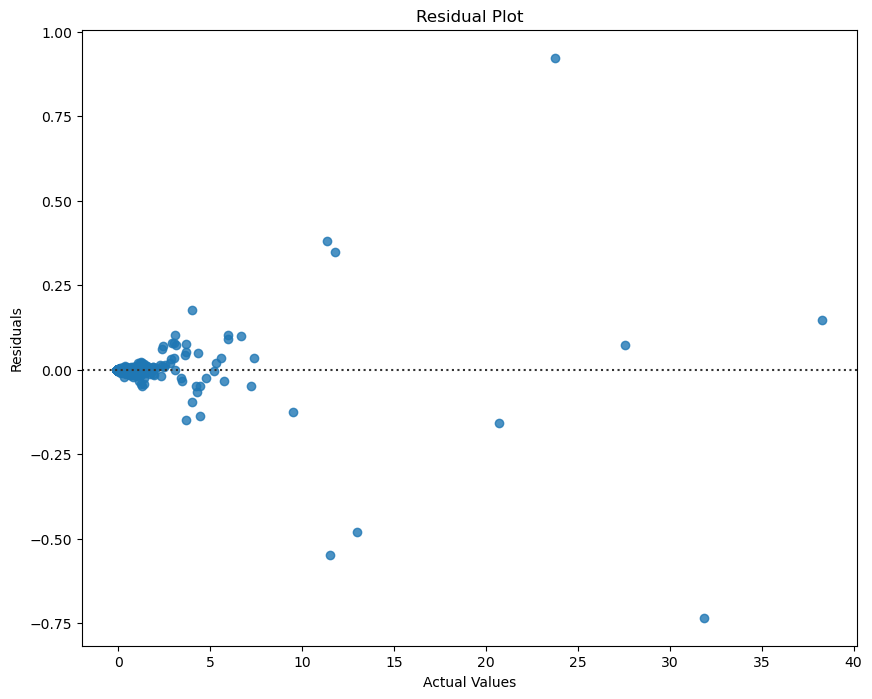

In [19]:
# Get predictions from the model
y_pred = rf.predict(X_test)

# Create a residual plot
plt.figure(figsize=(10, 8))
sns.residplot(y_test, y_pred)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

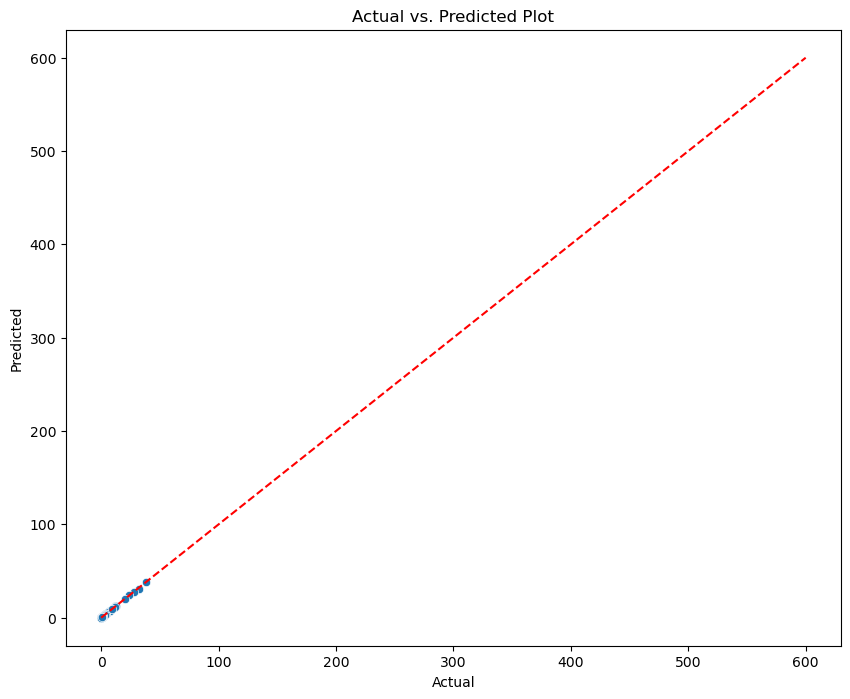

In [20]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 600], [0, 600], '--', color='red')
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

# load the data
df = pd.read_csv('https://raw.githubusercontent.com/niravpatidar37/Data/main/GCB2022v27_MtCO2_flat.csv')

# create a figure and axis object
fig, ax = plt.subplots()

# set the x and y limits of the plot
ax.set_xlim(1820, 2020)
ax.set_ylim(0, 40000)

# define a function to update the plot for each year
def update(year):
    ax.clear()
    data = df[df['Year'] == year]
    ax.bar(data['Country'], data['Total'])
    ax.set_title(f"CO2 emissions in {year}")
    ax.set_xlabel('Country')
    ax.set_ylabel('CO2 emissions (MtCO2)')

# create the animation object
ani = animation.FuncAnimation(fig, update, frames=range(1820, 2020))

# display the animation
HTML(ani.to_jshtml())